In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('Set2', n_colors=10)

In [2]:
pf = pd.read_csv("pseudo_facebook.tsv", sep='\t')

In [3]:
pf.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


### dob_day

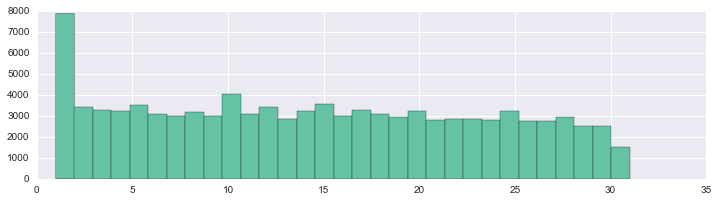

In [4]:
pf['dob_day'].hist(bins=31, figsize=(12,3))

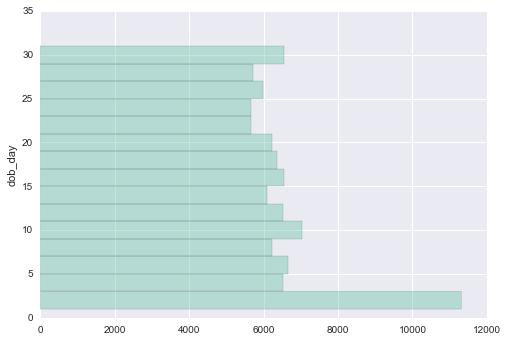

In [5]:
g = sns.distplot(pf['dob_day'], axlabel='dob_day', bins=15, vertical = True, kde=False)

No possibility to control bins number, only range of consequent elements in 'order':

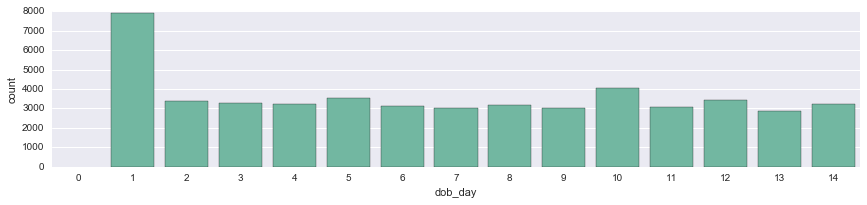

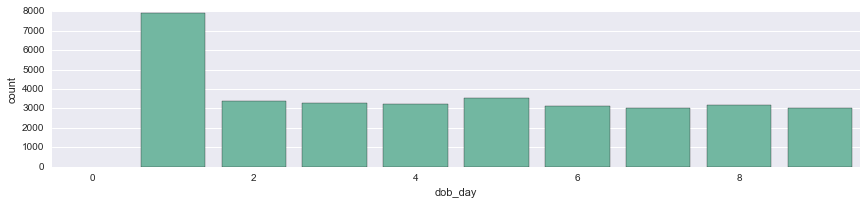

In [6]:
g = sns.factorplot('dob_day', data=pf, size=3, aspect=4, orient='h', order = range(0, 15), kind='count', color=sns.color_palette()[0])
g.set_xticklabels(step=1)    
g = sns.factorplot('dob_day', data=pf, size=3, aspect=4, orient='h', order = range(0, 10), kind='count', color=sns.color_palette()[0])
g.set_xticklabels(step=2)  

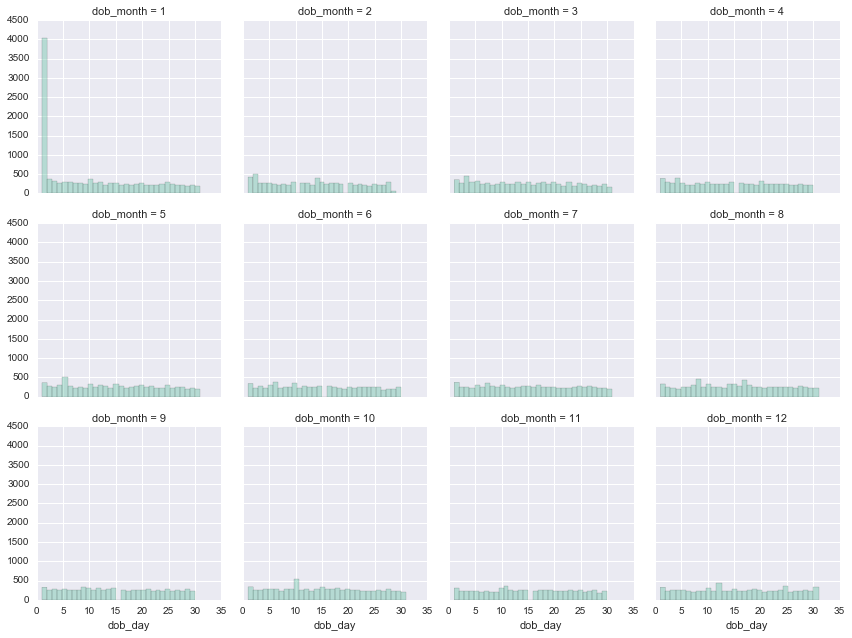

In [7]:
g = sns.FacetGrid(pf, col='dob_month', col_wrap=4)
g.map(sns.distplot, 'dob_day', bins=31, kde=False) 

### friend_count

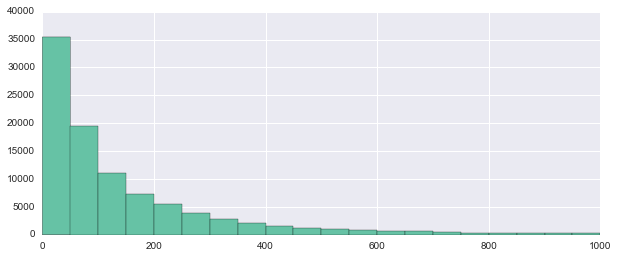

In [8]:
ax = pf['friend_count'].hist(bins=range(0, 1001, 50), figsize=(10,4))

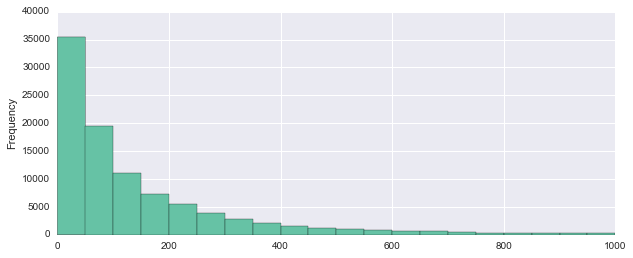

In [9]:
ax = pf['friend_count'].plot.hist(bins=range(0, 1001, 50), figsize=(10,4))

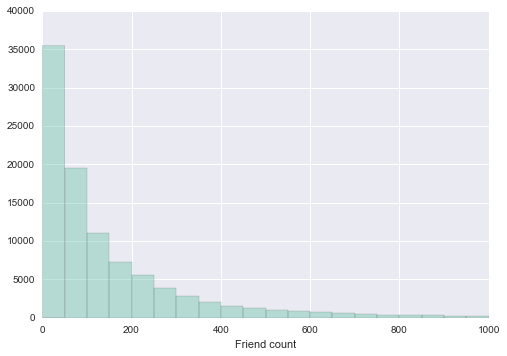

In [10]:
ax = sns.distplot(pf['friend_count'], bins=range(0, 1001, 50), axlabel='Friend count', kde=False)

Checking various bin widthes is important!

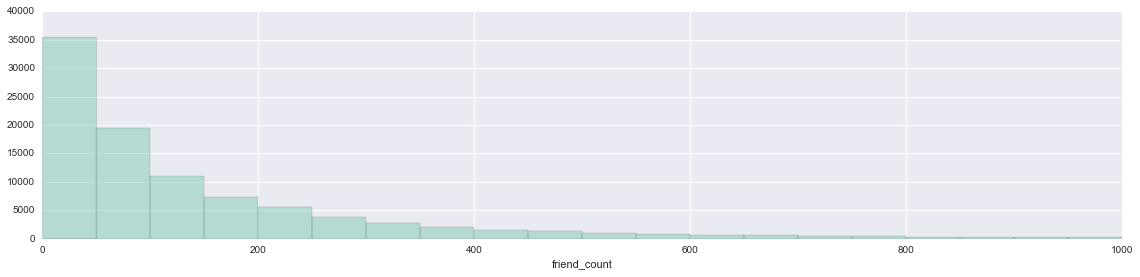

In [11]:
g = sns.FacetGrid(pf, size=4, aspect=4)
g.map(sns.distplot, 'friend_count', axlabel='Friend count', bins=range(0, 1001, 50), kde=False)

### friend_count by gender

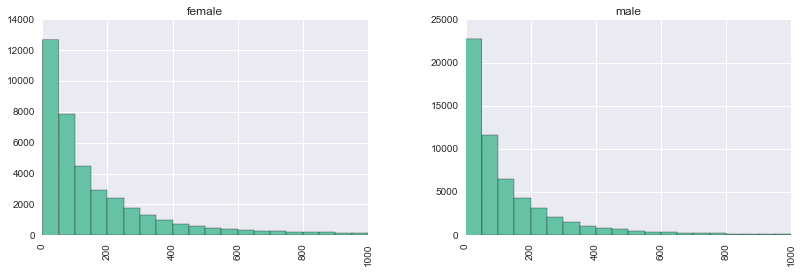

In [12]:
ax = pf.hist(column='friend_count', bins=range(0, 1001, 50), by='gender', figsize=(13,4))

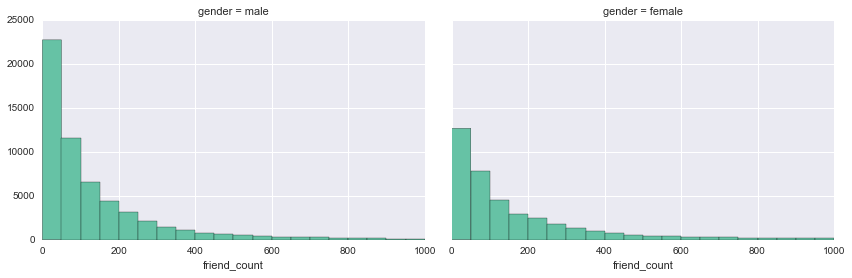

In [13]:
g = sns.FacetGrid(pf, col='gender', size=4, aspect=1.5)
g.map(plt.hist, 'friend_count', bins=range(0, 1001, 50))

In [14]:
pf['gender'].value_counts(dropna=False)

male      58574
female    40254
NaN         175
Name: gender, dtype: int64

Medians are better for skewed data:

In [15]:
pf.groupby('gender')['friend_count'].describe()

gender       
female  count    40254.000000
        mean       241.969941
        std        476.039706
        min          0.000000
        25%         37.000000
        50%         96.000000
        75%        244.000000
        max       4923.000000
male    count    58574.000000
        mean       165.035459
        std        308.466702
        min          0.000000
        25%         27.000000
        50%         74.000000
        75%        182.000000
        max       4917.000000
Name: friend_count, dtype: float64

### tenure

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000013C57A58>]], dtype=object)

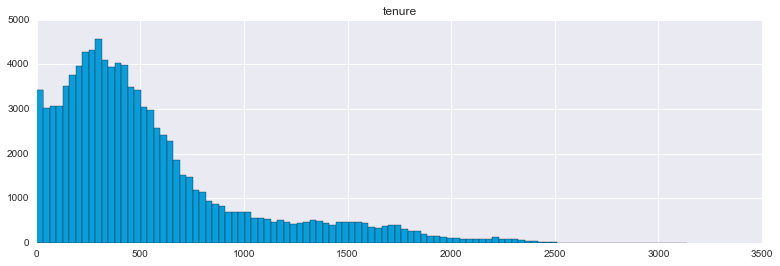

In [16]:
pf.hist(column='tenure', bins=100, figsize=(13,4), color='#099DD9')

In [17]:
pf['tenure_years'] = pf['tenure']/365
pf['tenure_years'].describe()

count    99001.000000
mean         1.473664
std          1.253835
min          0.000000
25%          0.619178
50%          1.128767
75%          1.849315
max          8.600000
Name: tenure_years, dtype: float64

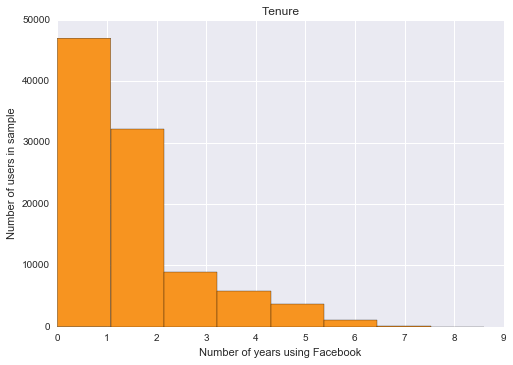

In [18]:
res = pf['tenure_years'].plot(kind='hist', bins=8, color='#F79420')\
   .set(xlabel='Number of years using Facebook', ylabel='Number of users in sample', title='Tenure')

### age

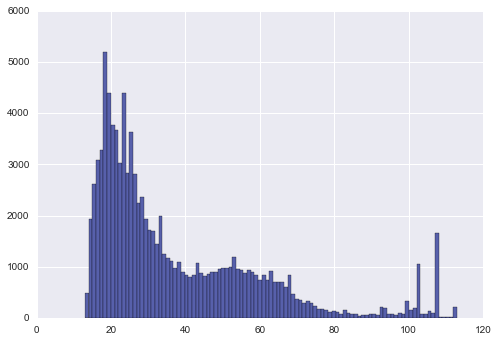

In [19]:
ax = pf['age'].hist(bins=max(pf['age'])-min(pf['age'])+1, color='#5760AB')

### Scaling friend_count

In [20]:
pf['friend_count_sqrt'] = np.sqrt(pf['friend_count'])
pf['friend_count_log'] = np.log10(pf['friend_count']+1)

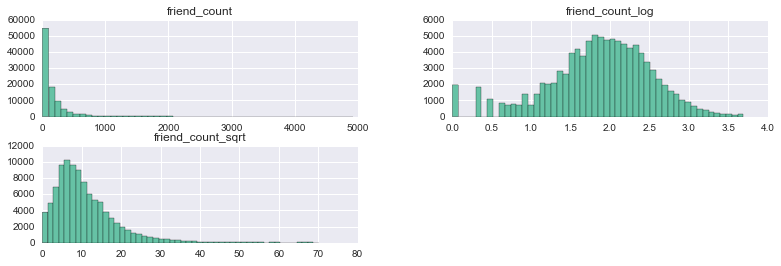

In [21]:
ax = pf.hist(column=['friend_count', 'friend_count_log', 'friend_count_sqrt'], bins=50, figsize=(13,4))

### Frequency polygons

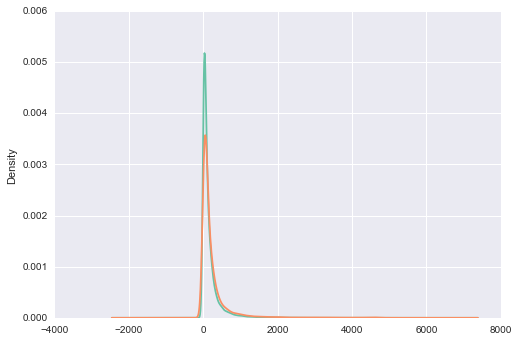

In [22]:
pf[pf['gender']=='male']['friend_count'].plot.kde()
pf[pf['gender']=='female']['friend_count'].plot.kde()

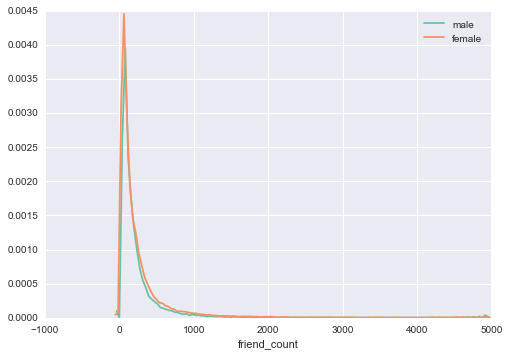

In [23]:
sns.distplot(pf[pf['gender']=='male']['friend_count'], hist=False, kde_kws={'label':'male'})
sns.distplot(pf[pf['gender']=='female']['friend_count'], hist=False, kde_kws={'label':'female'})

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in log10
  from ipykernel import kernelapp as app


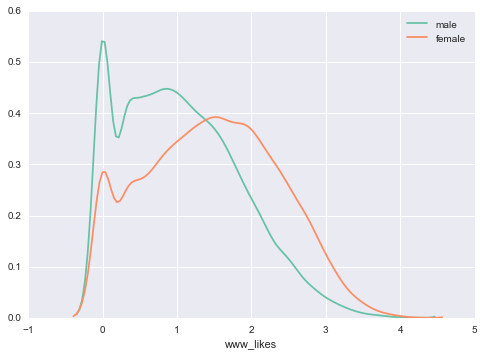

In [24]:
sns.distplot(np.log10(pf[pf['gender']=='male']['www_likes']), kde_kws={'label':'male'}, hist=False)
sns.distplot(np.log10(pf[pf['gender']=='female']['www_likes']), kde_kws={'label':'female'}, hist=False)

In [25]:
pf.groupby('gender')['www_likes'].sum()

gender
female    3507665
male      1430175
Name: www_likes, dtype: int64

### Box plots

[(0, 250)]

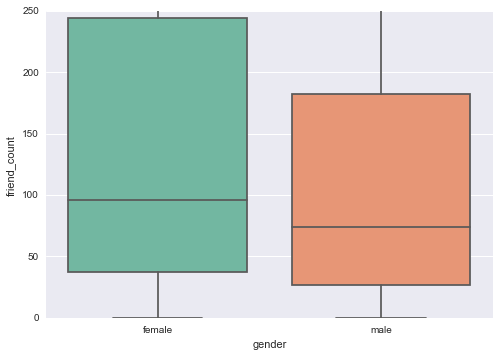

In [26]:
ax = sns.boxplot(x='gender', y='friend_count', data=pf, order=['female', 'male'])
ax.set(ylim=(0, 250))

In [27]:
pf.groupby('gender')['friend_count'].describe()

gender       
female  count    40254.000000
        mean       241.969941
        std        476.039706
        min          0.000000
        25%         37.000000
        50%         96.000000
        75%        244.000000
        max       4923.000000
male    count    58574.000000
        mean       165.035459
        std        308.466702
        min          0.000000
        25%         27.000000
        50%         74.000000
        75%        182.000000
        max       4917.000000
Name: friend_count, dtype: float64

[(0, 150)]

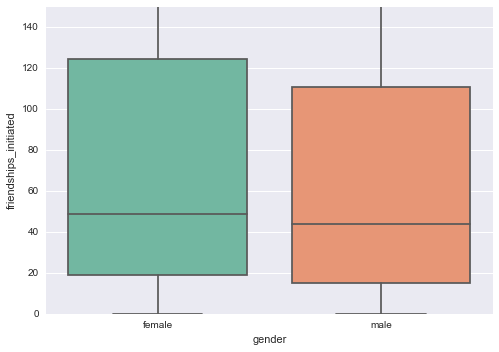

In [28]:
ax = sns.boxplot(x='gender', y='friendships_initiated', data=pf, order=['female', 'male'])
ax.set(ylim=(0, 150))

In [29]:
pf.groupby('gender')['friendships_initiated'].describe()

gender       
female  count    40254.000000
        mean       113.899091
        std        195.139308
        min          0.000000
        25%         19.000000
        50%         49.000000
        75%        124.750000
        max       3654.000000
male    count    58574.000000
        mean       103.066600
        std        184.292570
        min          0.000000
        25%         15.000000
        50%         44.000000
        75%        111.000000
        max       4144.000000
Name: friendships_initiated, dtype: float64

### Getting logical

In [30]:
pf['mobile_check_in'] = (pf['mobile_likes'] > 0).astype('int')
pf['mobile_check_in'].value_counts()

1    63947
0    35056
Name: mobile_check_in, dtype: int64

What percent of check is using mobile?

In [31]:
pf['mobile_check_in'].mean()

0.6459097199074776